In [3]:
import pandas as pd
import re
import numpy as np

import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("../result/Dynamite_YouTubeComment_20020_7_21_14.csv")

In [5]:
data

,Unnamed: 0,댓글 작성자,댓글,좋아요 개수
0,1,famili k-pop,Armys reportense con su like si están haciendo...,3.1천
1,2,Jaela V,"CAN’T STOP SMILING! this is such a feel good, ...",10만
2,3,Дарья Симан,Thank you for all of your hard work !!! The mu...,15만
3,4,Fatma Durmaz,I am so proud of these boys who can sing so ve...,7.4만
4,5,___u,i love how they’re breaking record after recor...,8만
...,...,...,...,...
5120,5121,EIA Valeria Cervantes,Es increíble como los Grammys pasaron de ser c...,204
5121,5122,방탄 소년단Tu amiga army,Bts no ganó los grammys pero también los gramm...,123
5122,5123,⟭⟬ᴋᴏᴏᴋᴍɪᴍɪ⟭⟬,"Recuerden Amys; ""Juntos ya lo tenemos todo"" No...",191
5123,5124,paula,Gracias a todas las armys que cumplieron con e...,128


In [6]:
def like_int(data):
    temp = []
    for like in data:
        unit = re.compile("[가-힇]+").findall(like)
        if unit == ['만']:
            like = float(like.replace(unit[0], ""))
            like *= 10000
        elif unit == ['천']:
            like = float(like.replace(unit[0], ""))
            like *= 1000
        else:
            like = float(like)
        
        temp.append(like)
            
    return temp

In [7]:
data['좋아요 개수'] = like_int(data['좋아요 개수'])

In [8]:
data['좋아요 개수'].describe()

count      5125.000000
mean       1355.303610
std        8831.711938
min           0.000000
25%           1.000000
50%           3.000000
75%         165.000000
max      320000.000000
Name: 좋아요 개수, dtype: float64

In [9]:
data['좋아요 개수'].value_counts().sort_index()

0.0         653
1.0         793
2.0         863
3.0         380
4.0         192
           ... 
130000.0      2
150000.0      1
160000.0      1
190000.0      1
320000.0      1
Name: 좋아요 개수, Length: 720, dtype: int64

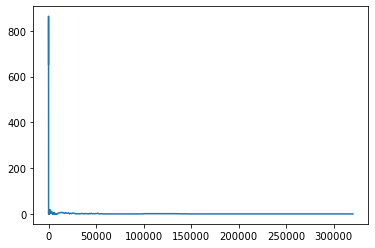

In [10]:
plt.plot(data['좋아요 개수'].value_counts().sort_index())
plt.show()

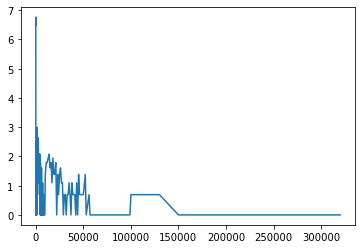

In [11]:
plt.plot(np.log(data['좋아요 개수'].value_counts().sort_index()))
plt.show()

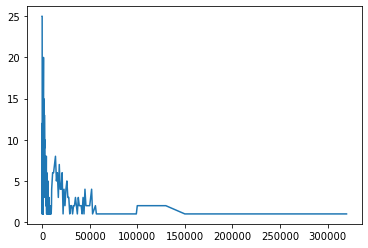

In [12]:
plt.plot(data['좋아요 개수'].value_counts().sort_index()[10:])
plt.show()